In [ ]:
https://github.com/facebookresearch/dinov3

In [ ]:
🧠 ViT (Vision Transformer)
Что это:

Трансформерная архитектура для компьютерного зрения
Разбивает изображение на патчи и обрабатывает их как последовательность
Аналогично тому, как трансформеры работают с текстом

Для чего:
Классификация изображений
Детекция объектов
Сегментация
Особенно хороши для задач, требующих понимания глобального контекста

In [ ]:
ViT models pretrained on web dataset (LVD-1689M):
Model	 Parameters	Pretraining   Dataset	Download
ViT-7B/16	6,716M	LVD-1689M	[link]
ViT-S/16 distilled	21M	LVD-1689M	[link]
ViT-S+/16 distilled	29M	LVD-1689M	[link]
ViT-B/16 distilled	86M	LVD-1689M	[link]
ViT-L/16 distilled	300M	LVD-1689M	[link]
ViT-H+/16 distilled	840M	LVD-1689M	[link]

In [ ]:
🏰 ConvNeXt
Что это:

"Модернизированный" ResNet с идеями из трансформеров
Сохраняет сверточную природу, но использует лучшие практики из ViT
Более эффективен чем ViT для некоторых задач

Для чего:
Те же задачи, что и ViT, но часто быстрее
Хороший баланс между точностью и скоростью
Часто используется как "учитель" для дистилляции

In [ ]:
ConvNeXt models pretrained on web dataset (LVD-1689M):

Model	Parameters	Pretrainin   Dataset	Download
ConvNeXt Tiny	29M	LVD-1689M	[link]
ConvNeXt Small	50M	LVD-1689M	[link]
ConvNeXt Base	89M	LVD-1689M	[link]
ConvNeXt Large	198M	LVD-1689M	[link]

In [ ]:
ViT models pretrained on satellite dataset (SAT-493M):

Model	Parameters	Pretraining Dataset	Download
ViT-L/16 distilled	300M	SAT-493M	[link]
ViT-7B/16	6,716M	SAT-493M	[link]

In [ ]:
🌐 LVD-1689M Dataset
Что это:

Large-scale Visual Dataset (1689 миллионов изображений)
Один из крупнейших датасетов для предобучения
Собран из общедоступных интернет-источников
    
Характеристики:
1.689 миллиарда изображений
Разнообразные домены: фото, рисунки, схемы и т.д.
Используется для предобучения без разметки (self-supervised)

In [ ]:
🛰️ SAT-493M - Что это?

SAT = Self-supervised Aerial Transformer (или Satellite/Aerial Imagery)
493M = 493 миллиона изображений

📡 Тип данных
Это датасет спутниковых и аэрофотоснимков:
Спутниковые изображения
Аэрофотосъемка
Снимки с дронов
Геопространственные данные

In [3]:
!pwd

/home/oleg/projects/ML/Pretrain_YOLO11_DINOv3


In [ ]:
Pretrain a YOLO model from Scratch with LightlyTrain

https://github.com/lightly-ai/lightly-train

https://www.youtube.com/watch?v=oBRWtxbK8D8

https://www.lightly.ai/lightly-train

https://colab.research.google.com/github/lightly-ai/lightly-train/blob/main/examples/notebooks/quick_start.ipynb

https://docs.lightly.ai/train/stable/index.html

In [9]:
from ultralytics import settings

# Установить текущую директорию для датасетов
settings.update({'datasets_dir': '/home/oleg/projects/datasets'})

# Проверить
print(settings["datasets_dir"])

/home/oleg/projects/datasets


In [3]:

from ultralytics import settings

print(settings["datasets_dir"])

/home/oleg/projects/ML/Pretrain_YOLO11_DINOv3
Unzipping /home/oleg/projects/ML/Pretrain_YOLO11_DINOv3/VOC/images/VOCtrainval_11-May-2012.zip to /home/oleg/projects/ML/Pretrain_YOLO11_DINOv3/VOC/images/VOCdevkit...: 100% ━━━━━━━━━━━━ 40189/40189 6.6Kfiles/s 6.1s0.1ss


In [8]:


from ultralytics.data.utils import check_det_dataset

dataset = check_det_dataset("HomeObjects-3K.yaml")

In [ ]:
'''
/home/oleg/projects/18_task/datasets/homeobjects-3K
/home/oleg/projects/18_task/datasets/homeobjects-3K/images/train
'''

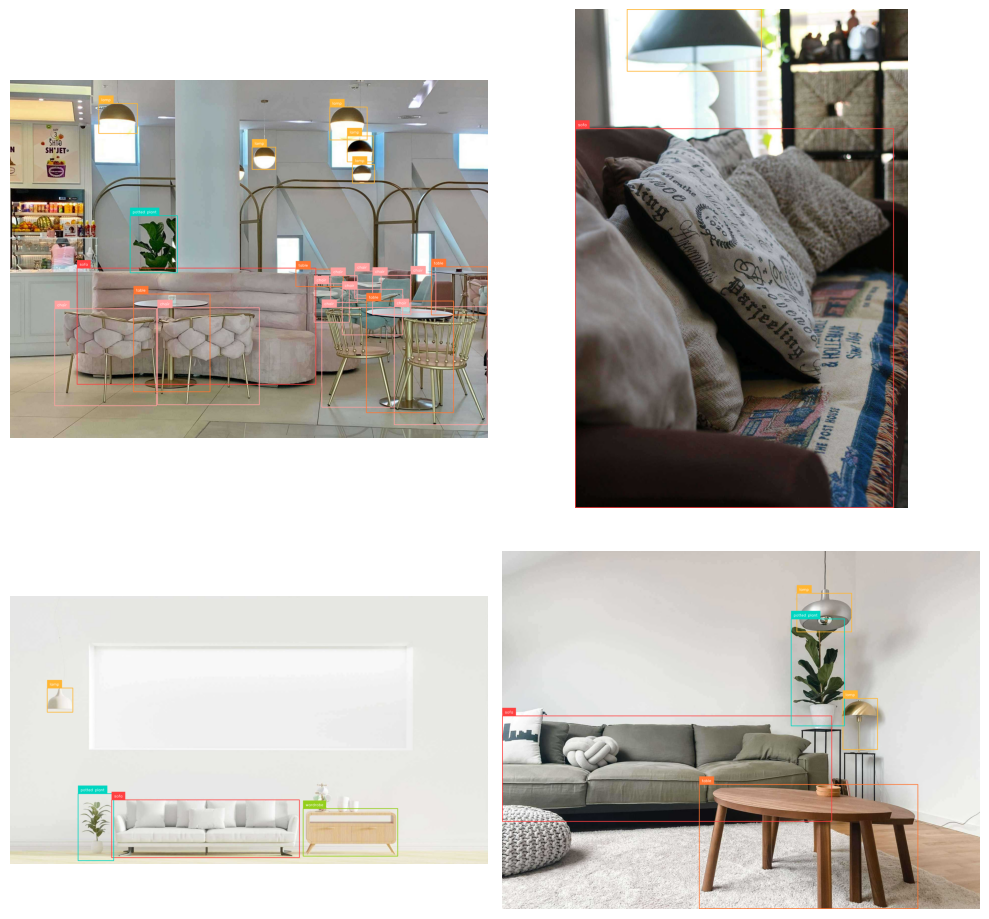

In [17]:
import random

import matplotlib.pyplot as plt
import supervision as sv
import yaml
from ultralytics import settings
from ultralytics.data.utils import check_det_dataset

#dataset = check_det_dataset("VOC.yaml")

detections = sv.DetectionDataset.from_yolo(
    data_yaml_path=dataset["yaml_file"],
    
    images_directory_path=f"/home/oleg/projects/ML/Pretrain_YOLO11_DINOv3/homeobjects-3K/images/train",        # /home/oleg/projects/18_task/datasets/homeobjects-3K/images/train
    annotations_directory_path=f"/home/oleg/projects/ML/Pretrain_YOLO11_DINOv3/homeobjects-3K/labels/train",   # /home/oleg/projects/18_task/datasets/homeobjects-3K/labels/train
)

with open(dataset["yaml_file"], "r") as f:
    data = yaml.safe_load(f)

names = data["names"]

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.flatten()

detections = [detections[random.randint(0, len(detections))] for _ in range(4)]

for i, (path, image, annotation) in enumerate(detections):
    annotated_image = box_annotator.annotate(scene=image, detections=annotation)
    annotated_image = label_annotator.annotate(
        scene=annotated_image,
        detections=annotation,
        labels=[names[elem] for elem in annotation.class_id],
    )
    ax[i].imshow(annotated_image[..., ::-1])
    ax[i].axis("off")

fig.tight_layout()
fig.show()

In [18]:
# Для VOC датасета (17K images):
targets_for_voc = {
    "отличный_результат": {
        "loss": "0.6-0.7",
        "sim_acc": "0.80-0.85", 
        "epochs": "150-200"
    },
    "хороший_результат": {
        "loss": "0.7-0.8", 
        "sim_acc": "0.75-0.80",
        "epochs": "100-150"
    },
    "минимальный_результат": {
        "loss": "0.8-0.9",
        "sim_acc": "0.70-0.75", 
        "epochs": "50-100"
    }
}

In [18]:
import lightly_train
import inspect

print("Доступные аргументы lightly_train.train():")
print(inspect.signature(lightly_train.train))

Доступные аргументы lightly_train.train():
(*, out: 'PathLike', data: 'PathLike | Sequence[PathLike]', model: 'str | Module | ModelWrapper | Any', method: 'str' = 'distillation', method_args: 'dict[str, Any] | None' = None, embed_dim: 'int | None' = None, epochs: "int | Literal['auto']" = 'auto', batch_size: 'int' = 128, num_workers: "int | Literal['auto']" = 'auto', devices: 'int | str | list[int]' = 'auto', num_nodes: 'int' = 1, resume_interrupted: 'bool' = False, checkpoint: 'PathLike | None' = None, overwrite: 'bool' = False, accelerator: 'str | Accelerator' = 'auto', strategy: 'str | Strategy' = 'auto', precision: "_PRECISION_INPUT | Literal['auto']" = 'auto', float32_matmul_precision: "Literal['auto', 'highest', 'high', 'medium']" = 'auto', seed: 'int' = 0, loggers: 'dict[str, dict[str, Any] | None] | None' = None, callbacks: 'dict[str, dict[str, Any] | None] | None' = None, optim: 'str' = 'auto', optim_args: 'dict[str, Any] | None' = None, transform_args: 'dict[str, Any] | None'

In [ ]:

https://docs.lightly.ai/train/stable/methods/distillation.html

Supported Teacher Models
The following models for teacher are supported:

DINOv3

dinov3/vits16

dinov3/vits16plus

dinov3/vitb16

dinov3/vitl16

dinov3/vitl16plus

dinov3/vith16plus

dinov3/vit7b16

DINOv2

dinov2/vits14

dinov2/vitb14

dinov2/vitl14

dinov2/vitg14

In [ ]:
https://github.com/facebookresearch/dinov3

https://huggingface.co/facebook/dinov3-vitb16-pretrain-lvd1689m


In [19]:
!pwd

/home/oleg/projects/ML/Pretrain_YOLO11_DINOv3


In [ ]:
https://huggingface.co/facebook/dinov3-vitb16-pretrain-lvd1689m/resolve/main/model.safetensors?download=true

In [ ]:
# Уже входит в huggingface_hub
from huggingface_hub import notebook_login

# Логин в интерфейсе Jupyter
notebook_login()

In [19]:
import torch
import lightly_train

# Проверка доступности GPU
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA version: {torch.version.cuda}")
    print(f"GPU device: {torch.cuda.get_device_name(0)}")
    print(f"GPU count: {torch.cuda.device_count()}")

CUDA available: True
CUDA version: 12.4
GPU device: NVIDIA GeForce RTX 4070
GPU count: 1


In [27]:

import lightly_train

data_path = "/home/oleg/projects/ML/Pretrain_YOLO11_DINOv3/homeobjects-3K/images/train"


lightly_train.train(
    out="out/my_distillation_pretrain_experiment",
    data=data_path,
    model="ultralytics/yolo11m.yaml",
    method="distillation",
    overwrite=True,
    devices=1,  # Использовать первый GPU
    accelerator="gpu",  # Явно указать GPU
    epochs=20,
    batch_size=128,
    method_args={
        # "teacher": "dinov3/vits16",
        # "teacher_url": "/home/oleg/projects/ML/Pretrain_YOLO11_DINOv3/dinov3_vits16_pretrain_lvd1689m-08c60483.pth"
        "teacher": "dinov3/vitb16",
        "teacher_url": "/home/oleg/projects/ML/Pretrain_YOLO11_DINOv3/dinov3_vitb16_pretrain_lvd1689m-73cec8be.pth"
        #"teacher": "dinov3/vitl16",
        #"teacher_url": "/home/oleg/projects/ML/Pretrain_YOLO11_DINOv3/dinov3_vitl16_pretrain_lvd1689m-8aa4cbdd.pth"
    }
)

Args: {
    "accelerator": "gpu",
    "batch_size": 128,
    "callbacks": null,
    "checkpoint": null,
    "data": "/home/oleg/projects/ML/Pretrain_YOLO11_DINOv3/homeobjects-3K/images/train",
    "devices": 1,
    "embed_dim": null,
    "epochs": 20,
    "float32_matmul_precision": "auto",
    "loader_args": null,
    "loggers": null,
    "method": "distillation",
    "method_args": {
        "teacher": "dinov3/vitb16",
        "teacher_url": "/home/oleg/projects/ML/Pretrain_YOLO11_DINOv3/dinov3_vitb16_pretrain_lvd1689m-73cec8be.pth"
    },
    "model": "ultralytics/yolo11m.yaml",
    "model_args": null,
    "num_nodes": 1,
    "num_workers": "auto",
    "optim": "auto",
    "optim_args": null,
    "out": "out/my_distillation_pretrain_experiment",
    "overwrite": true,
    "precision": "auto",
    "resume": null,
    "resume_interrupted": false,
    "seed": 0,
    "strategy": "auto",
    "trainer_args": null,
    "transform_args": null
}
Using output directory '/home/oleg/projects/ML

Training: |                                                                                   | 0/? [00:00<?, …

`Trainer.fit` stopped: `max_epochs=20` reached.
Training completed.
Example: How to use the exported model
----------------------------------------------------------------------------------------
from ultralytics import YOLO

# Load the pretrained model
model = YOLO('/home/oleg/projects/ML/Pretrain_YOLO11_DINOv3/out/my_distillation_pretrain_experiment/exported_models/exported_last.pt')

# Finetune or evaluate the model
...
----------------------------------------------------------------------------------------

Model exported.


In [1]:
from ultralytics import YOLO

model = YOLO('/home/oleg/projects/ML/Pretrain_YOLO_LightlyTrain/out/coco_minitrain_pretrain/exported_models/exported_last.pt')

# Дообучение на детекции
model.train(
    data='HomeObjects-3K.yaml',
    epochs=50,
    imgsz=640,
    batch=32,
    lr0=0.0001,      # Меньше LR для тонкой настройки
    patience=10,     # Ранняя остановка
    save=True,
   #pretrained=True  # Использовать предобученный backbone
)

New https://pypi.org/project/ultralytics/8.3.223 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.221 🚀 Python-3.11.14 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=HomeObjects-3K.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/home/oleg/projects/ML/Pretrain_YOLO_LightlyTrain/out/coco_minitrain_pretrain/exported_model

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x73030a1668d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,  

In [6]:
from ultralytics import YOLO

# Загрузите дообученную модель
model = YOLO('/home/oleg/projects/ML/Pretrain_YOLO11_DINOv3/runs/detect/train9/weights/best.pt')  # обычно best.pt или last.pt

# Посмотреть классы
print("Классы модели:")
print(model.names)

Классы модели:
{0: 'bed', 1: 'sofa', 2: 'chair', 3: 'table', 4: 'lamp', 5: 'tv', 6: 'laptop', 7: 'wardrobe', 8: 'window', 9: 'door', 10: 'potted plant', 11: 'photo frame'}


✅ Модель загружена успешно!
Параметры: 9.4M

Found https://imodern.ru/upload/iblock/1c3/9k8nxffjo4b6nwtc9l59r3dp4wuo9axr.jpg locally at 9k8nxffjo4b6nwtc9l59r3dp4wuo9axr.jpg
image 1/1 /home/oleg/projects/ML/Pretrain_YOLO11_DINOv3/9k8nxffjo4b6nwtc9l59r3dp4wuo9axr.jpg: 416x640 1 chair, 1 wardrobe, 2 potted plants, 27.1ms
Speed: 1.5ms preprocess, 27.1ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)
Results saved to /home/oleg/projects/ML/Pretrain_YOLO11_DINOv3/runs/detect/predict6


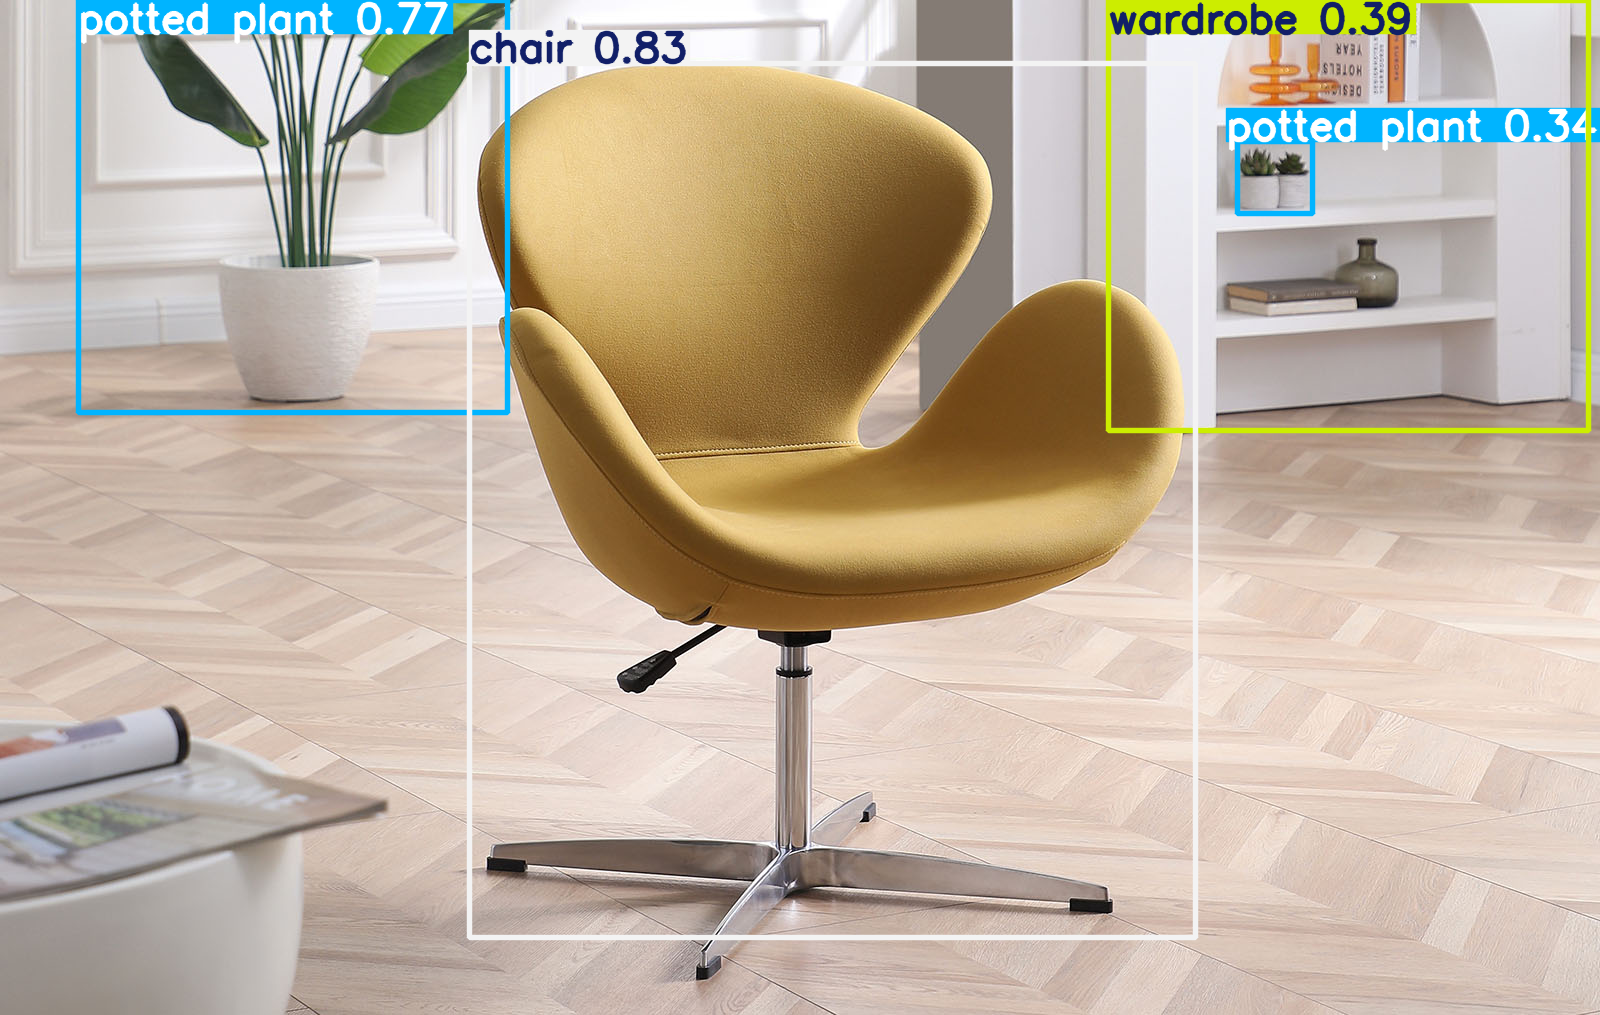

✅ Инференс работает!


In [12]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import torch

# Загрузите предобученную модель
model = YOLO('/home/oleg/projects/ML/Pretrain_YOLO11_DINOv3/runs/detect/train9/weights/best.pt')

# Проверка
print("✅ Модель загружена успешно!")
print(f"Параметры: {sum(p.numel() for p in model.model.parameters()) / 1e6:.1f}M")

# Тест на примере
results = model('https://imodern.ru/upload/iblock/1c3/9k8nxffjo4b6nwtc9l59r3dp4wuo9axr.jpg', save = True)

# ✅ Самый простой способ - используем встроенный метод
for r in results:
    r.show()  # ✅ Автоматически показывает в Jupyter

print("✅ Инференс работает!")